# ICD - AF
Introdução à Ciência de Dados - Avaliação Final

### Questão 1:

Assinale a afirmação incorreta:

Escolha uma opção:

a.Escolher o melhor modelo envolve a redução da variância e viés.<br>
<font color='red'> b.Os dados de teste devem ser usados na validação cruzada para selecionar os modelos.</font> <br>
c.Validação cruzada é usada no conjunto de treinamento.<br>
d.No aprendizado supervisionado, o objetivo é ajustar um modelo preditivo a partir de um conjunto de exemplos de modo que o modelo seja capaz de prever dados não observados.<br>
e.Overfitting ocorre quando um modelo se ajusta muito bem ao conjunto de dados anteriormente observados, mas se mostra ineficaz para prever novos resultados.<br>

### Questão 2:

Assinale a alternativa correta:

Escolha uma opção:

a.O algoritmo kmeans não é sensível à posição inicial das sementes.<br>
b.No algoritmo kmeans tradicional não precisamos fornecer o número de clusters.<br>
c.Nos métodos de agrupamento, kmeans e hierárquico, devemos fornecer os rótulos das classes.<br>
<font color='red'>d.Normalized mutual information é um exemplo de índice externo, usado na avaliação de agrupamentos.</font> <br>
e.A transformação dos dados nunca ajuda a reduzir a complexidade computacional.<br>

### Questão 3:
Para a base de dados BostonHousing, calcule o coeficiente R2 usando regressão linear múltipla.   
Uso o código abaixo e arredonde para uma casa decimal.  

Use: model = LinearRegression()

Escolha uma opção:

a.0.3<br>
b.0.4<br>
c.1.0<br>
<font color='red'>d.0.7</font> <br>
e.0.5<br>

In [2]:
#Código para ler os dados:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
data = pd.read_csv('data/BostonHousing.csv', header=(0))
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]
p = 0.2 # fracao e elementos no conjnto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Ajuste dos coeficientes da Regressão Linear

In [3]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

Como temos várias variáveis, não é possível mostrar os resultados em mais de três dimensões.   
Vamos visualizar a precisão na predição graficando os valores reais versus as predições.   
Quanto mais próximo da reta em vermelho, melhor será a predição, pois essa reta representa o caso 𝑦̂=𝑦 ou y_pred=y_test

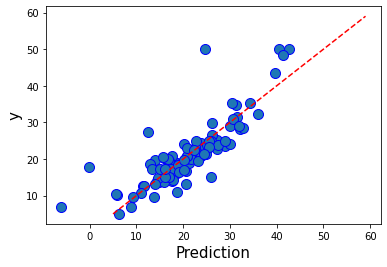

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)
# salva a figura em um arquivo
# fig.savefig('regression-LR.jpg')

Calculando o coeficiente R2 para quantificar o ajuste

In [5]:
from sklearn.metrics import r2_score
R2 = round(r2_score(y_test, y_pred),1)
print('R2:', R2)

R2: 0.7


### Questão 4:

Assinale a alternativa correta.

Escolha uma opção:

a.A árvore de decisão requer normalização dos dados.<br>
b.O algoritmo regressão logística é um classificador não linear.<br>
c.O método k-vizinhos é um classificador linear.<br>
d.A curva ROC quantifica os resultados do agrupamento de dados.<br>
<font color='red'>e.O algoritmo Naive Bayes assume que os atributos são independentes.</font> <br>

### Questão 5:
Considere os dados gerados com o código abaixo.   
Calcule as medidas Accuracy e Recall usando uma árvore de decisão com o critério Gini.   

Use: model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)

Escolha uma opção:

a.Accuracy = 0.71, Recall = 0.67<br>
b.Accuracy = 0.71, Recall = 0.87<br>
c.Accuracy = 0.55, Recall = 0.56<br>
<font color='red'>d.Accuracy = 0.98, Recall = 0.99</font> <br>
e.Accuracy = 0.77, Recall = 0.99<br>

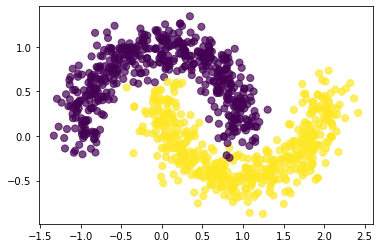

In [6]:
from sklearn import datasets
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

 
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.15, random_state=42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

 
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

Usando o modelo DecisionTreeClassifier

In [13]:
from sklearn import tree
# Cria o modelo usando o criterio Gini e random_state=42
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)
# Ajusta o modelo usando os dados de treinamento
model.fit(x_train,y_train)
# realiza a predição
y_pred = model.predict(x_test)

from sklearn.metrics import recall_score, accuracy_score
# calcula a acurácia e recall
score = accuracy_score(y_pred, y_test)
recall = recall_score(y_test, y_pred)
print('Accuracy:', round(score,2))
print('Recall:', round(recall,2))


Accuracy: 0.98
Recall: 0.99


Visualizando a árvore

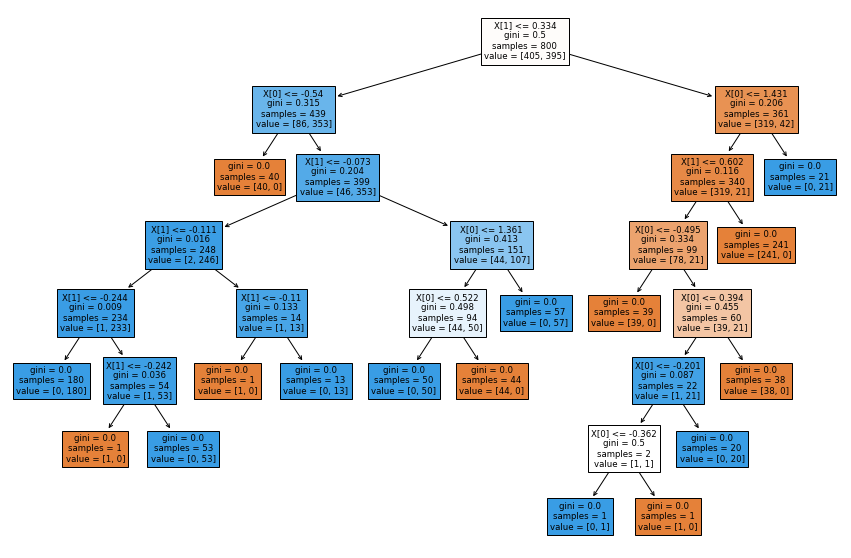

In [8]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

Plotando a região de separação

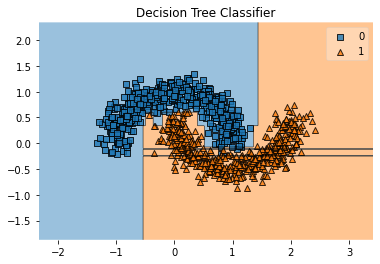

In [15]:
# Observando as fronteiras de predição
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, model)
plt.title('Decision Tree Classifier');